In [1]:
#Primero importo las bibliotecas que utilizare a lo largo del programa
import pandas as pd #
import numpy as np #ESta biblioteca me ayudara a hacer calculos numericos y en este caso me sera de gran utilidad pues cuenta con la funcion de FFT
import matplotlib.pyplot as plt #Esta me ayudara a graficar los datos que obtenga a lo largo del programa  

In [2]:
df = pd.read_excel('Tarea Datos.xlsx', sheet_name='Hoja 1') #Primero leo los datos de la hoja de excel que nos paso el profesor y los guardo en un DAtaFrame
df

,Tiempo (ms),Datos
0,0,0.034281
1,1,2.903810
2,2,0.281685
3,3,1.213575
4,4,0.409638
...,...,...
251,251,-2.162654
252,252,-1.809242
253,253,2.079974
254,254,1.009394


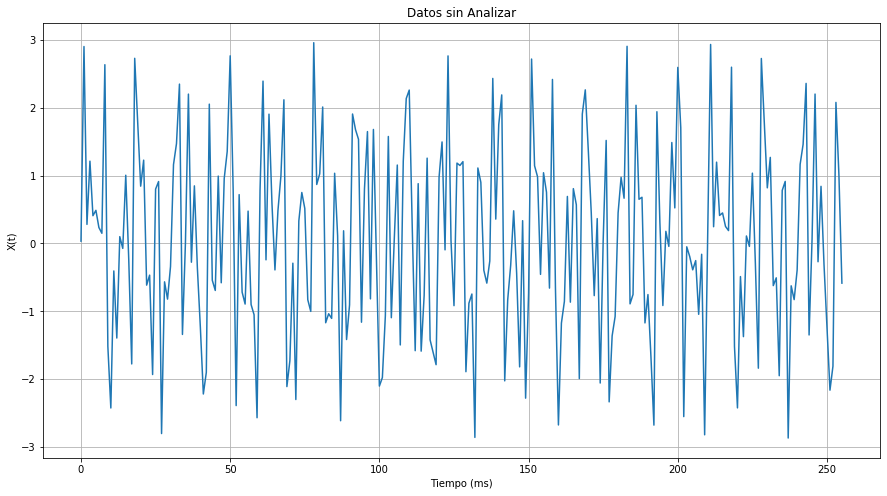

In [44]:
#Aqui grafico los datos otorgados por el profesor
plt.figure(figsize=[15,8])
plt.plot(df['Tiempo (ms)'],df['Datos']) # Con el tiempo en el eje X y los datos en el eje Y
plt.title("Datos sin Analizar")
plt.ylabel("X(t)")
plt.xlabel("Tiempo (ms)")
plt.grid(True)
plt.show()

In [37]:
#A continuacion le aplicare la transformada discreta de Fourier a los datos anteriores
a=np.fft.fft(df['Datos'])/df["Datos"].count() #Utilizo la funcion de la biblioteca Numpy "fft" que aplica la transformada rapida de Fourier (FFT por sus siglas en ingles)
                                              #Y lo divido entre la cantidad de datos para que este normalizada
freq=np.fft.fftfreq(df['Tiempo (ms)'].count(),1) #Aqui obtengo las frecuencias a partir de los tiempos dados
#Separo los datos ya transformados en sus componentes reales e imaginarias 
Real=a.real #Parte Real
Imag=a.imag #Parte Imaginaria
safe=np.array([abs(freq),Real,Imag]) #Guardo las frecuencias obtenidas, asi como las partes real e imaginaria en un arreglo
                                     #Cabe destacar que por la naturaleza de la transformada de Fourier, en el proceso se obtienen frecuencias negativas
                                     #Lo cual no tiene sentido fisico, es por eso que utilizo el valor absoluto de estas
TF=pd.DataFrame(safe.T,columns=["Frecuencia KHz","Parte Real","Parte Imaginaria"]) #Guardo los datos obtenidos en un DataFrame
TF

,Frecuencia KHz,Parte Real,Parte Imaginaria
0,0.000000,0.062747,0.000000
1,0.003906,0.013339,-0.000908
2,0.007812,0.013377,0.000962
3,0.011719,0.013289,-0.000225
4,0.015625,0.012648,-0.002602
...,...,...,...
251,0.019531,0.013244,0.000784
252,0.015625,0.012648,0.002602
253,0.011719,0.013289,0.000225
254,0.007812,0.013377,-0.000962


In [38]:
#Aqui saco la magnitud y la fase y las guardo en el mismo DataFrame
r=TF["Parte Real"]
I=TF["Parte Imaginaria"]
TF["Magnitud"]=np.sqrt((r**2)+(I**2)) #Magnitud
TF["Fase"]=np.arctan(I/r) #Fase
TF

,Frecuencia KHz,Parte Real,Parte Imaginaria,Magnitud,Fase
0,0.000000,0.062747,0.000000,0.062747,0.000000
1,0.003906,0.013339,-0.000908,0.013370,-0.067933
2,0.007812,0.013377,0.000962,0.013411,0.071822
3,0.011719,0.013289,-0.000225,0.013291,-0.016892
4,0.015625,0.012648,-0.002602,0.012913,-0.202876
...,...,...,...,...,...
251,0.019531,0.013244,0.000784,0.013267,0.059135
252,0.015625,0.012648,0.002602,0.012913,0.202876
253,0.011719,0.013289,0.000225,0.013291,0.016892
254,0.007812,0.013377,-0.000962,0.013411,-0.071822


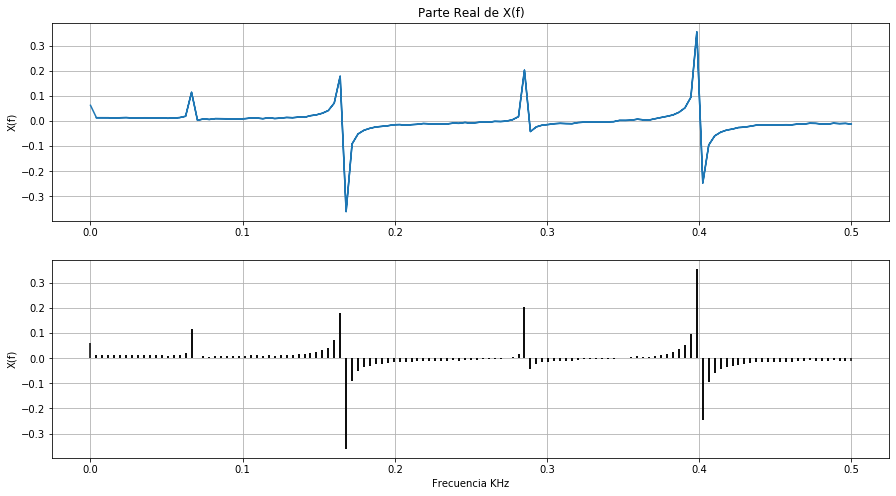

In [45]:
#La siguiente es una grafica de la parte real de la transformada vs las frecuencias en KHz
plt.figure(figsize=[15,8]) #Ajusto el tamaño de la grafica 
ax1=plt.subplot(211) #Primera grafica
ax1.plot(TF['Frecuencia KHz'],TF['Parte Real']) #Aqui se representa la grafica con la linea azul con las frecuencias en el eje X y la parte real en el eje Y
plt.title("Parte Real de X(f)") #Titulo de la Grafica 
plt.ylabel("X(f)")
plt.grid(True)
ax2=plt.subplot(212) #Segunda grafica 
ax2.vlines(TF["Frecuencia KHz"],0,TF["Parte Real"]) #La grafica con lineas verticales con las frecuencias en el eje X y la parte real en el eje Y
plt.xlabel("Frecuencia KHz")
plt.ylabel("X(f)")
plt.grid(True)
plt.show()

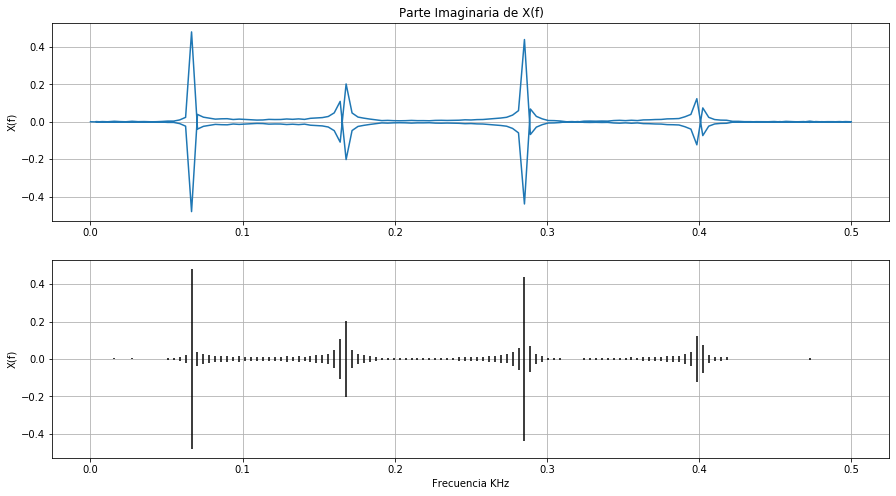

In [46]:
#La siguiente es una grafica de la parte imaginaria de la transformada vs las frecuencias en KHz
plt.figure(figsize=[15,8]) #Ajusto el tamaño de la grafica 
ax1=plt.subplot(211) #Primera grafica
ax1.plot(TF['Frecuencia KHz'],TF['Parte Imaginaria']) #Aqui se representa la grafica con la linea azul con las frecuencias en el eje X y la parte imaginaria en el eje Y
plt.title("Parte Imaginaria de X(f)") #Titulo de la Grafica 
plt.ylabel("X(f)")
plt.grid(True)
ax2=plt.subplot(212) #Segunda grafica 
ax2.vlines(TF["Frecuencia KHz"],0,TF["Parte Imaginaria"]) #La grafica con lineas verticales con las frecuencias en el eje X y la parte imaginaria en el eje Y
plt.xlabel("Frecuencia KHz")
plt.ylabel("X(f)")
plt.grid(True)
plt.show()

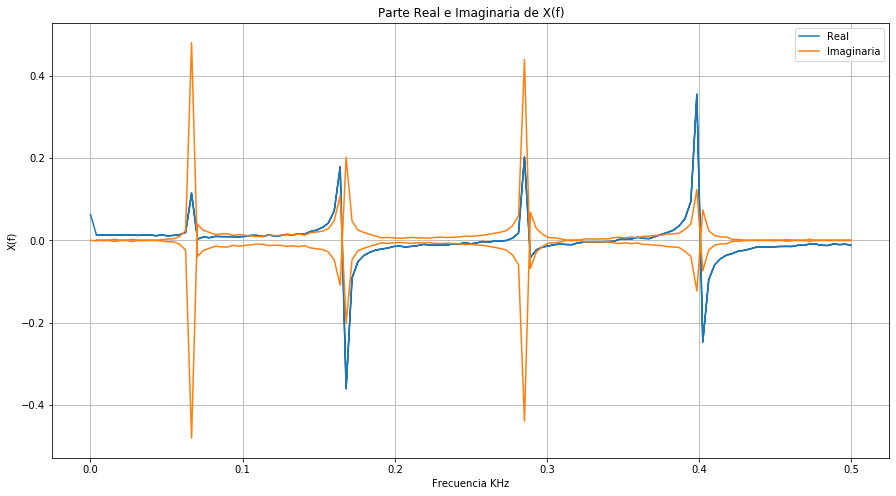

In [47]:
#En la siguiente grafica junto ambas partes, real e imaginaria vs las Frecuencias
plt.figure(figsize=[15,8]) # Ajusto el tamaño de la grafica 
plt.plot(TF['Frecuencia KHz'],TF['Parte Real']) #Grafico de la parte real
plt.plot(TF['Frecuencia KHz'],TF['Parte Imaginaria']) #Grafico de la parte imaginaria 
plt.title("Parte Real e Imaginaria de X(f)") #Titulo de la grafica 
plt.legend(["Real","Imaginaria"]) #Leyendas
plt.xlabel("Frecuencia KHz") 
plt.ylabel("X(f)")
plt.grid(True)
plt.show()

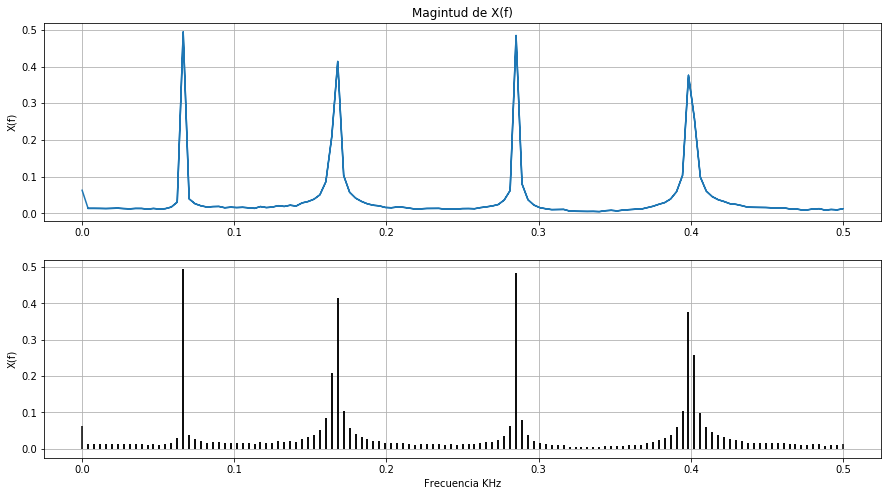

In [48]:
#La siguiente es una grafica de la magnitud vs las frecuencias en KHz
plt.figure(figsize=[15,8]) #Ajusto el tamaño de la grafica 
ax1=plt.subplot(211) #Primera grafica
ax1.plot(TF['Frecuencia KHz'],TF['Magnitud']) #Aqui se representa la grafica con la linea azul con las frecuencias en el eje X y la magnitud en el eje Y
plt.title("Magintud de X(f)") #Titulo de la Grafica 
plt.ylabel("X(f)")
plt.grid(True)
ax2=plt.subplot(212) #Segunda grafica 
ax2.vlines(TF["Frecuencia KHz"],0,TF["Magnitud"]) #La grafica con lineas verticales con las frecuencias en el eje X y la magnitud en el eje Y
plt.xlabel("Frecuencia KHz")
plt.ylabel("X(f)")
plt.grid(True)
plt.show()

Como se puede apreciar en la grafica anterior, se trata de 4 señales sinusoidales a diferentes frecuencias. Notese que la de menor frecuencia es tambien la de mayor amplitud

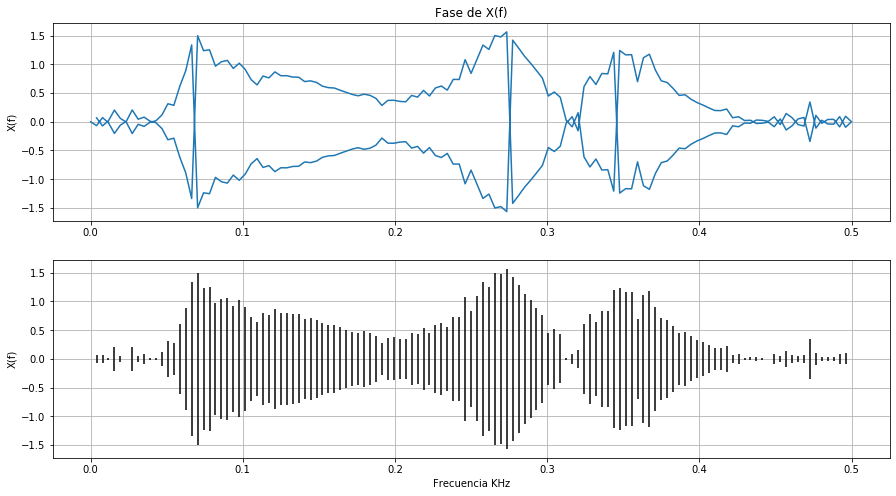

In [49]:
#La siguiente es una grafica de la fase vs las frecuencias en KHz
plt.figure(figsize=[15,8]) #Ajusto el tamaño de la grafica 
ax1=plt.subplot(211) #Primera grafica
ax1.plot(TF['Frecuencia KHz'],TF['Fase']) #Aqui se representa la grafica con la linea azul con las frecuencias en el eje X y la fase en el eje Y
plt.title("Fase de X(f)") #Titulo de la Grafica 
plt.ylabel("X(f)")
plt.grid(True)
ax2=plt.subplot(212) #Segunda grafica 
ax2.vlines(TF["Frecuencia KHz"],0,TF["Fase"]) #La grafica con lineas verticales con las frecuencias en el eje X y la fase en el eje Y
plt.xlabel("Frecuencia KHz")
plt.ylabel("X(f)")
plt.grid(True)
plt.show()